# SPEI - Future data - Cork Airport

In [2]:
# set working directory to root
setwd("../../")

In [3]:
# import requirements and functions
source(
    "./jupyter-notebooks/scripts/spi-spei.R",
    echo = TRUE,
    max.deparse.length = 2000
)


> library(eurocordexr)


Loading required package: data.table

Loading required package: magrittr

Loading required package: ncdf4

Loading required package: ncdf4.helpers




> library(SPEI)


Loading required package: lmomco

Loading required package: parallel

Loading required package: ggplot2

# Package SPEI (1.7) loaded [try SPEINews()].




> library(latticeExtra)


Loading required package: lattice


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer





> library(lubridate)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union





> kelvin_to_celsius <- function(kelvin) {
+     celsius <- (kelvin - 273.15)
+     return(celsius)
+ }

> kgm2s_to_mmday <- function(kgm2s) {
+     mmday <- (kgm2s * 60 * 60 * 24)
+     return(mmday)
+ }

> ec_process <- function(datapath, indexcell, var) {
+     df <- nc_grid_to_dt(filename = datapath, variable = var)
+     df <- subset(df, icell == indexcell)
+     df$date <- as.Date(df$date, format = "%Y-%m-%d")
+     df$month <- month(df$date, label = TRUE)
+     df$year <- year(df$date)
+     if (var == "pr") {
+         df$pr <- kgm2s_to_mmday(df$pr)
+     }
+     else if (var == "tasmax") {
+         df$tasmax <- kelvin_to_celsius(df$tasmax)
+     }
+     else if (var == "tasmin") {
+         df$tasmin <- kelvin_to_celsius(df$tasmin)
+     }
+     return(df)
+ }

> hist_process <- function(datadir, variable, indexcell) {
+     ncfile <- paste(datadir, variable, "_EUR-11_NCC-NorESM1-M_historical_r1i1p1_DMI-HIRHAM5_v3_mon_", 
+         sep = "")
+     d1 <- ec_process(datapath = 

In [4]:
# Cork Airport grid cell
indexcell <- 68801

# latitude
lat <- 51.84722

# directory where the future nc files are stored
datadir <- "./data/eurocordex/DMI/rcp85/mon/"

In [5]:
# process precipitation data
data <- future_process(
    datadir = datadir, variable = "pr", indexcell = indexcell
)

In [6]:
# process tasmax data
data$tasmax <- future_process(
    datadir = datadir, variable = "tasmax", indexcell = indexcell
)$tasmax

In [7]:
# process tasmin data
data$tasmin <- future_process(
    datadir = datadir, variable = "tasmin", indexcell = indexcell
)$tasmin

In [8]:
head(data)

pr,month,year,tasmax,tasmin
<dbl>,<ord>,<dbl>,<dbl>,<dbl>
5.325353,Jan,2041,10.322321,5.181146
2.974051,Feb,2041,8.952783,4.934869
6.127268,Mar,2041,11.452539,6.666895
3.691406,Apr,2041,12.237360,7.816461
1.923135,May,2041,14.021906,8.056146
2.319792,Jun,2041,16.967859,11.378900


In [9]:
dcast(data, year~month, value.var = c("pr"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,5.325353,2.974051,6.127268,3.691406,1.923135,2.3197917,0.2391633,2.2245463,1.6585937,3.304184,3.299219,6.471522
2042,5.424395,4.335938,5.186744,2.218750,1.731855,2.5083334,1.4881553,2.0640120,2.2924479,2.771421,3.375260,2.797379
2043,3.769153,6.925502,5.718498,1.007552,1.883317,2.6601561,1.5831654,2.3951614,0.9546875,3.777722,6.102084,2.533266
2044,7.269405,4.352679,2.115171,1.661979,1.807964,2.9367187,2.3591230,1.8964214,2.1916667,2.757308,2.802344,5.183468
2045,2.991683,2.681641,5.389869,3.972396,1.015121,1.7044271,0.5410786,0.4947077,4.1773439,4.564768,3.702083,5.781754
2046,4.148941,5.866629,3.886593,1.199479,1.171119,2.4200522,1.4422883,1.9614416,2.5411459,2.957157,3.778906,4.295615
2047,4.313508,1.532087,4.038306,2.602865,3.406754,2.5851562,3.2167338,0.2797379,2.1010417,6.419103,3.538281,4.838206
2048,3.899194,2.032645,5.200353,3.040625,2.368700,1.9338542,0.4311996,1.5655243,2.9940104,4.339718,2.981250,3.865675
2049,3.359375,3.384208,4.035786,4.191146,2.039315,2.6049479,1.1464214,1.1786794,3.0161458,3.529234,3.268490,3.734627


In [10]:
dcast(data, year~month, value.var = c("tasmax"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,10.322321,8.952783,11.452539,12.23736,14.02191,16.96786,20.71563,19.93200,18.62798,15.98846,13.88647,9.795984
2042,10.922510,8.845392,10.520654,13.55355,14.96072,16.38583,18.98898,17.89532,17.08502,13.41155,12.79012,9.891046
2043,9.387903,11.425745,11.945184,13.68017,15.48657,16.53875,19.04040,20.51693,17.85580,15.48553,10.95376,10.064325
2044,8.173730,8.484186,11.962793,12.24731,15.32635,17.14471,17.76843,18.21859,18.23275,14.91503,11.17892,11.020563
2045,10.646753,11.179163,10.150842,11.83532,17.13189,17.74743,20.86913,18.95904,17.90466,14.39315,12.42382,9.162775
2046,11.550378,11.685052,11.019983,13.35720,14.48000,17.01266,19.98126,20.81115,18.61050,14.39114,12.52636,11.891046
2047,9.094995,9.743829,11.001733,13.57363,15.44879,17.32250,17.95651,19.85269,17.27526,14.38320,12.90875,10.342737
2048,8.974084,10.690576,11.620325,12.92663,16.38815,18.70101,21.05203,19.94033,18.32894,15.38696,11.62524,10.414789
2049,9.080591,11.122797,11.159265,13.13223,14.62771,17.86138,19.94039,19.26119,18.75430,15.60348,11.02157,11.532495


In [11]:
dcast(data, year~month, value.var = c("tasmin"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,5.181146,4.934869,6.666895,7.816461,8.056146,11.37890,13.51830,14.91271,13.17227,11.451624,9.752985,6.002557
2042,6.586603,5.166010,6.035333,8.720758,8.726587,10.83630,12.94503,12.59445,11.73937,8.124506,9.070856,6.206049
2043,5.357568,7.513788,7.263391,7.486108,9.334589,11.18530,13.31652,14.49072,11.52023,10.415216,6.917169,6.328516
2044,4.240015,4.395532,7.201563,6.326715,9.755182,11.04641,12.55264,13.01287,13.02773,10.304834,7.389215,7.214746
2045,6.504633,6.222467,6.183466,6.702875,10.726526,11.93322,13.73458,13.34207,12.72466,9.550317,8.348444,5.031519
2046,7.763910,5.814111,6.837213,8.030786,7.680841,10.93536,13.90511,14.68499,12.81283,9.032434,8.336725,8.542322
2047,4.595239,5.279321,6.130975,7.910883,9.672174,11.03256,13.10964,13.88226,11.33236,10.570398,9.092767,7.408990
2048,4.723993,6.297449,7.356866,7.084009,10.780756,12.54803,13.97030,14.09454,12.63156,10.451196,7.523126,6.955103
2049,4.850275,7.145532,6.913446,8.814233,9.205316,11.73388,13.52090,13.24703,13.49734,11.205713,6.273889,7.348413


## SPEI-12

In [12]:
spei <- spei_calc(data = data, spei_num = 12, lat = lat)

In [13]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.90287255
2042,0.91947038,1.097533849,1.245762507,0.892094699,0.65282264,0.8139610,1.57489401,1.58990812,1.69828074,1.73987590,1.82016183,1.65798463
2043,1.67121492,1.754223847,1.650058716,1.222809849,1.27700249,1.3727680,1.34833385,0.65143363,0.29230929,0.27802211,0.46105644,0.38852553
2044,0.61150514,0.581256171,0.397999597,0.772110583,1.07558640,0.6396851,1.03901873,1.52905547,1.71367056,1.78202043,1.66364667,1.78083186
2045,1.51754159,1.248761605,1.768423199,1.976469825,1.65642035,1.6396539,-0.11439212,-0.40504261,-0.19182489,-0.07912602,-0.11091387,-0.09729956
2046,-0.08505899,0.006133794,-0.162644664,-0.598992025,-0.23362051,-0.1257946,0.53783600,0.15849443,-0.12653801,-0.31427586,-0.34302126,-0.48983000
2047,-0.52563565,-0.572975127,-0.693352069,-0.687664657,-0.40463751,-0.5347504,0.56421648,0.65091269,0.75175690,1.21237620,1.21901401,1.28774714
2048,1.28757597,1.334044853,1.516250994,1.534527005,1.54140535,1.3404419,-0.64149010,-0.45363760,-0.40014286,-0.81189831,-0.84126219,-0.96296439
2049,-1.03397093,-0.962887149,-1.024496995,-0.444502542,-0.09218159,0.1796572,0.66314072,0.66119659,0.75705819,0.82002511,0.79091875,0.66749057


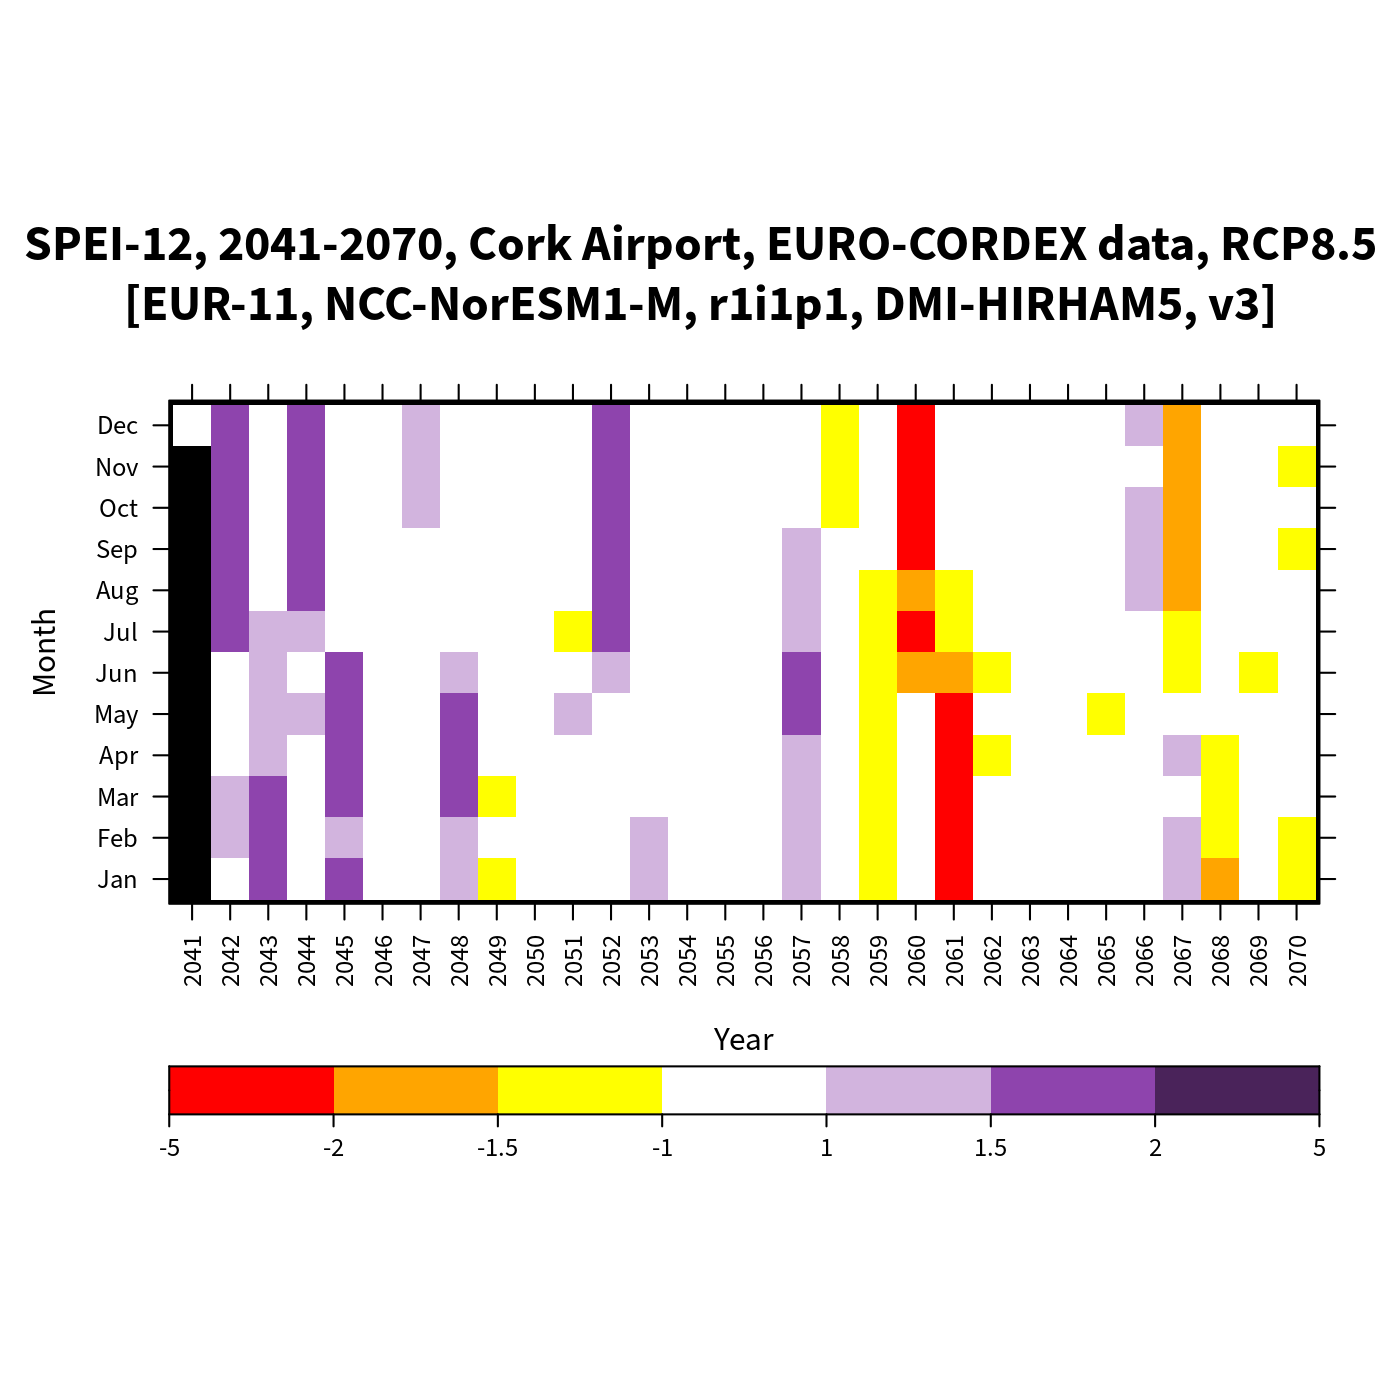

In [15]:
plot_title <- paste(
    "SPEI-12, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)

## SPEI-6

In [16]:
spei <- spei_calc(data = data, spei_num = 6, lat = lat)

In [17]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,NA,NA,NA,NA,NA,1.90901425,0.814845117,1.03598629,9.055011e-01,0.29988970,-0.184501510,-0.75134462
2042,0.65467579,0.55666964,1.17599546,1.522939809,1.327000575,1.56696750,1.523636372,1.61250766,1.653017e+00,1.51018422,1.590413186,1.14410713
2043,1.26301262,0.77371568,0.44950391,-0.541398483,-0.460356206,0.68122746,0.975060220,0.49425220,1.590731e-01,0.53082492,0.821649977,-0.09650665
2044,-0.49883901,0.61395392,0.73369994,0.870528419,0.590885930,0.84892861,1.400887949,1.52991683,1.832918e+00,1.83971498,1.803862825,1.89150489
2045,1.07850976,-0.72213173,0.28024732,1.301177522,-0.006473369,0.08591238,-0.652870240,-0.22578064,-3.694892e-01,-0.65943172,-0.125583309,-0.24977636
2046,1.22675290,0.93230422,0.57851898,0.206401444,-0.127016336,0.02413839,0.002754936,-0.13102650,-4.170356e-01,-0.41633202,-0.336587783,-0.89483264
2047,-1.27203266,-1.29132436,-0.71277229,-0.797082716,-0.044701997,0.03895447,1.304210745,1.11833744,1.163217e+00,1.63272475,1.538798891,1.82448836
2048,0.61228543,0.99357001,1.30615086,0.314399921,0.274090484,-0.25964786,-1.027023244,-0.83033607,-1.072451e+00,-1.01497117,-1.100140237,-1.44678969
2049,-0.57259981,-0.42427789,0.08833097,1.336908899,1.616470258,1.38314085,1.005346668,0.89117979,8.859857e-01,0.40210795,-0.148508159,-0.47069662


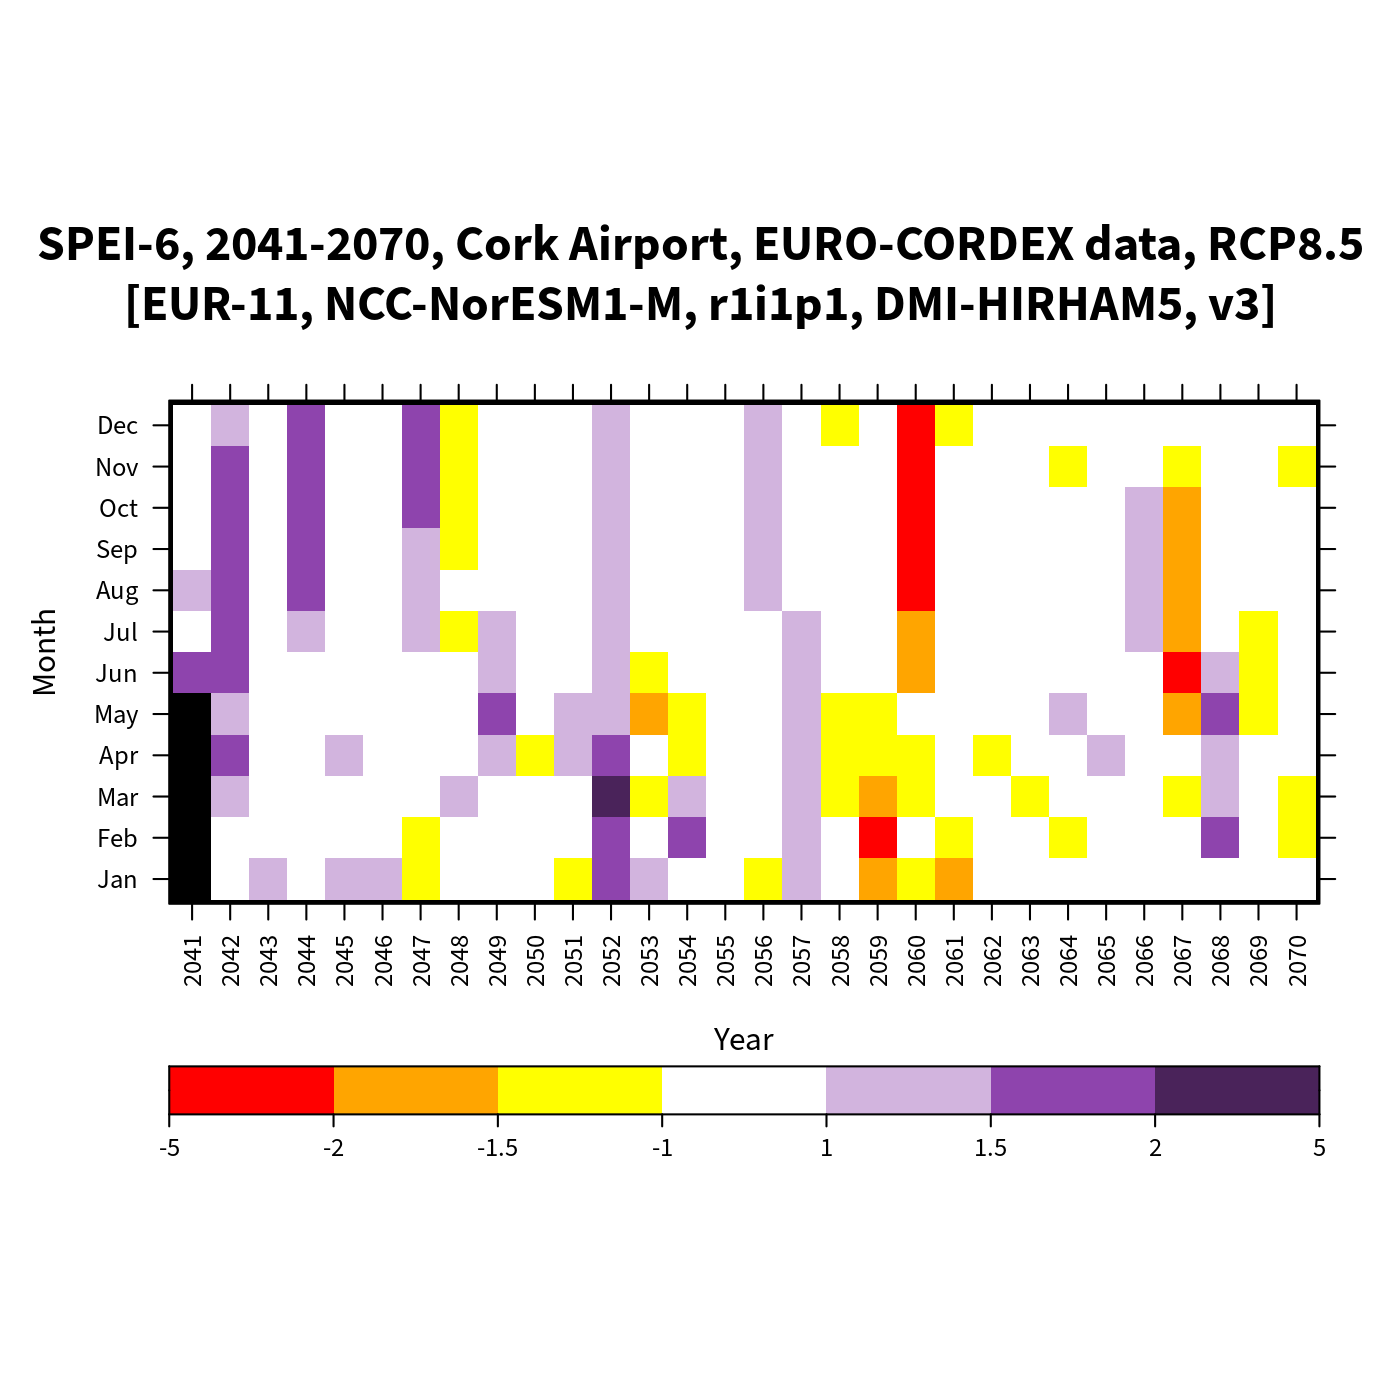

In [19]:
plot_title <- paste(
    "SPEI-6, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)

## SPEI-3

In [20]:
spei <- spei_calc(data = data, spei_num = 3, lat = lat)

In [21]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,NA,NA,0.72763062,1.69147564,1.72562817,2.26935814,-0.005464134,0.08390322,-0.73105735,0.52472021,-1.03658215,-0.02635831
2042,0.67241822,1.68172614,1.69852683,1.38374160,0.60615990,1.28611541,1.018847989,1.51477265,1.42039929,1.49340138,0.38258885,-0.90485530
2043,-0.66980987,0.78544029,1.17815248,-0.28396009,-0.90363965,0.31489459,1.211273279,0.99952141,-0.02737903,-1.25791929,-0.71231316,-0.02398710
2044,1.86969944,1.50931144,1.04017082,-0.25756775,-0.24852783,0.62540315,1.640872744,1.82176101,1.97507793,1.28135215,0.07691323,-0.05697752
2045,-0.43588982,-1.27118367,0.39682669,1.45016748,0.37951107,-0.08742230,-1.233323116,-0.47871260,-0.50016281,1.10485681,1.17123309,0.77103666
2046,0.50740481,0.06406940,0.16544891,-0.07709677,-0.26437821,-0.05903510,0.098835725,-0.04981709,-0.60801930,-1.22743057,-1.10573565,-0.89951712
2047,-0.09667062,-0.57532048,-0.41161169,-0.82178036,0.07402879,0.24796924,1.727520289,1.18115985,1.41420758,0.50120888,1.31039792,1.76815882
2048,0.63506992,-0.03250689,0.16773449,-0.02556268,0.20148221,-0.43467903,-1.036078996,-0.99495544,-1.37016747,-0.24675334,-0.39568068,-0.42626301
2049,-0.55188335,-0.16667578,0.37839167,1.51336106,1.83045419,1.69995203,0.341171997,-0.16467417,-0.14752535,0.08195545,-0.00506144,-0.90357213


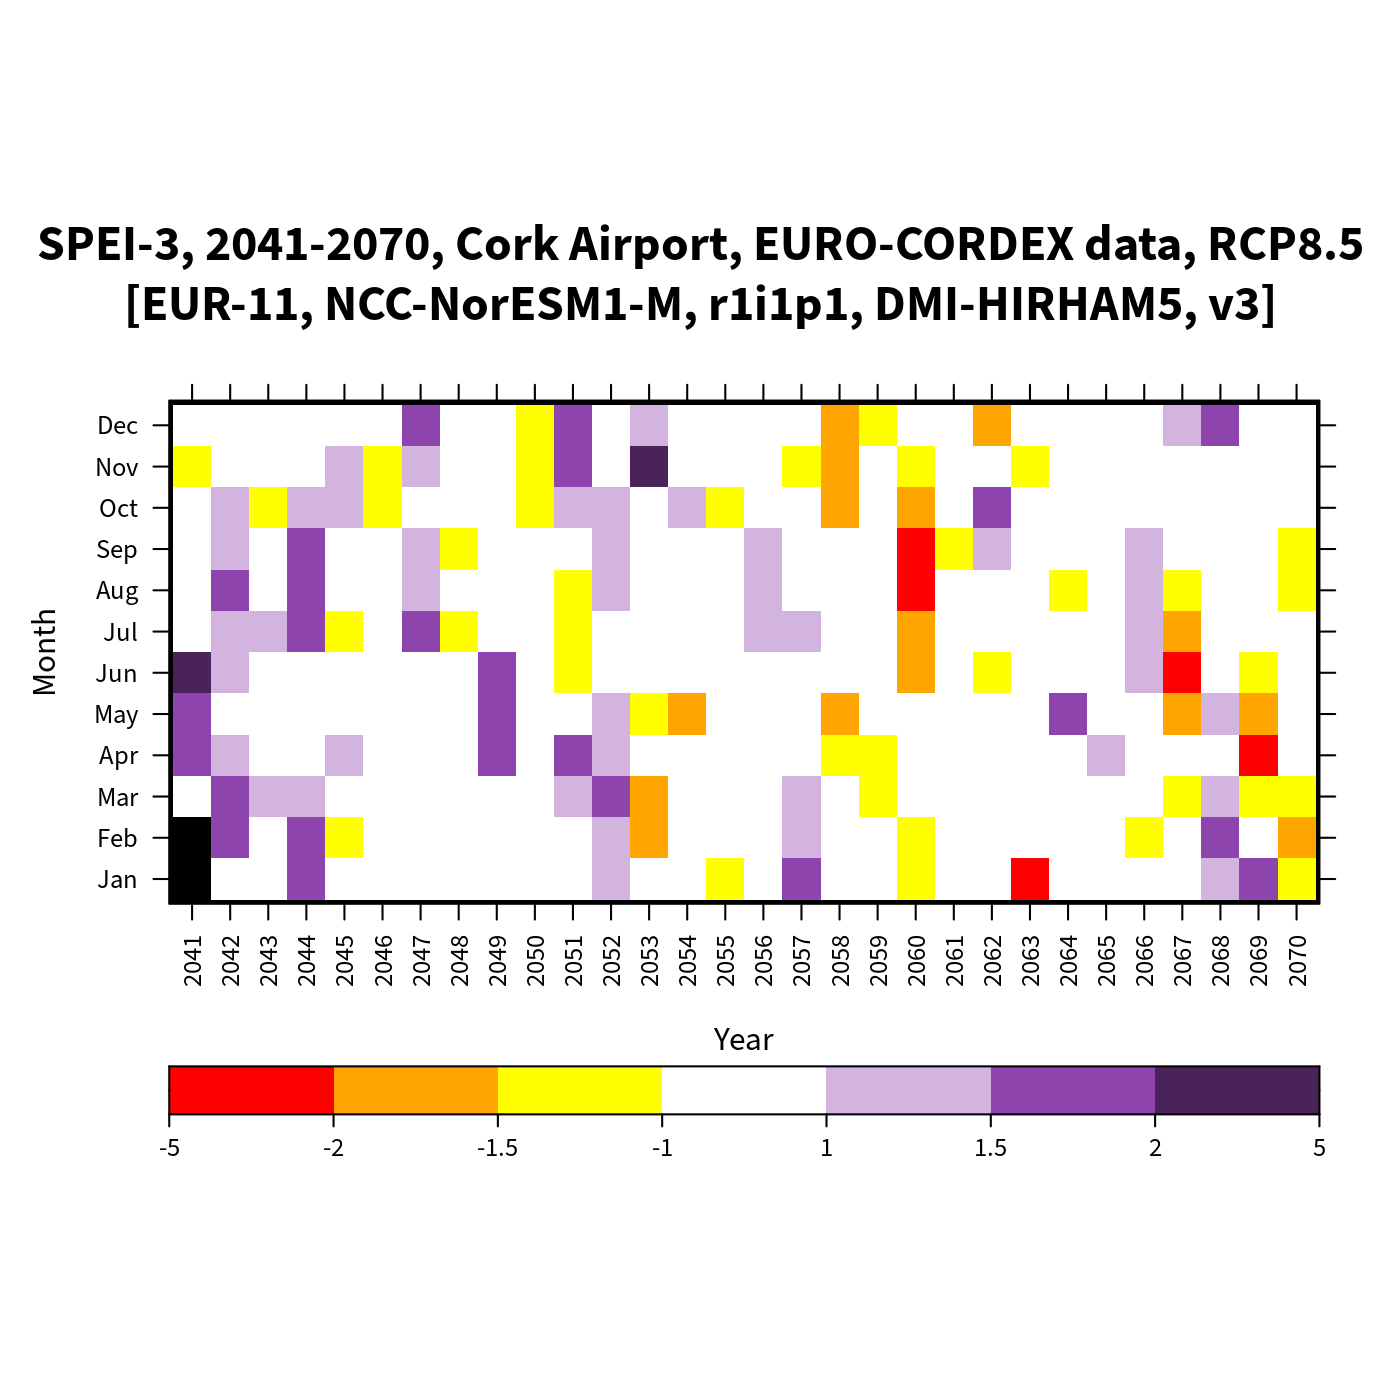

In [23]:
plot_title <- paste(
    "SPEI-3, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)

## SPEI-1

In [24]:
spei <- spei_calc(data = data, spei_num = 1, lat = lat)

In [25]:
# view the data
spei

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,0.202201403,0.50935952,0.71562942,1.97042384,0.85580026,1.121710364,-1.47913280,1.17679246,-0.367286342,-0.314600060,-1.3927349,1.48137766
2042,0.740431845,1.37756247,1.19111605,0.39063231,-0.09213916,1.629876329,0.45757710,1.58045984,1.097249042,-0.247916693,-0.2261702,-0.97794000
2043,0.301700733,1.49206601,0.43086763,-1.82547537,-0.29342920,1.908677147,0.77464971,-0.50770469,-1.566535645,-0.605836624,1.6364679,-1.37935475
2044,2.384457250,1.20255564,-0.96057207,-0.45535920,0.54272792,0.457472861,1.80329180,1.53444806,0.597108660,-0.153943108,-0.1392610,0.60255283
2045,-1.030921283,-1.65335994,1.98715043,1.46945166,-1.66269626,0.239308333,-1.45561868,0.53516088,1.503694429,0.668444411,-0.2683287,1.14045902
2046,0.071292258,-0.83916707,0.85055167,-0.56224326,-0.54776123,0.456358554,-0.02492081,-0.97784167,-0.582740938,-0.882756136,-0.3947670,0.12474476
2047,0.421217505,-1.15614630,0.05746510,-0.72231834,0.56019958,0.085782139,2.14427254,-0.56685046,-0.028322920,1.860660087,-0.2704606,1.12687715
2048,0.355484338,-1.20315339,0.94084993,-0.38117406,-0.02354860,-0.487111882,-1.49606089,-0.08447372,0.008829005,-0.002875501,-0.5778587,0.07936893
2049,-0.124938087,-0.06198089,0.75640579,1.83537160,1.16559420,-0.007726593,-0.40061510,-0.01652542,0.507501203,0.224665616,-0.8160971,-1.18576516


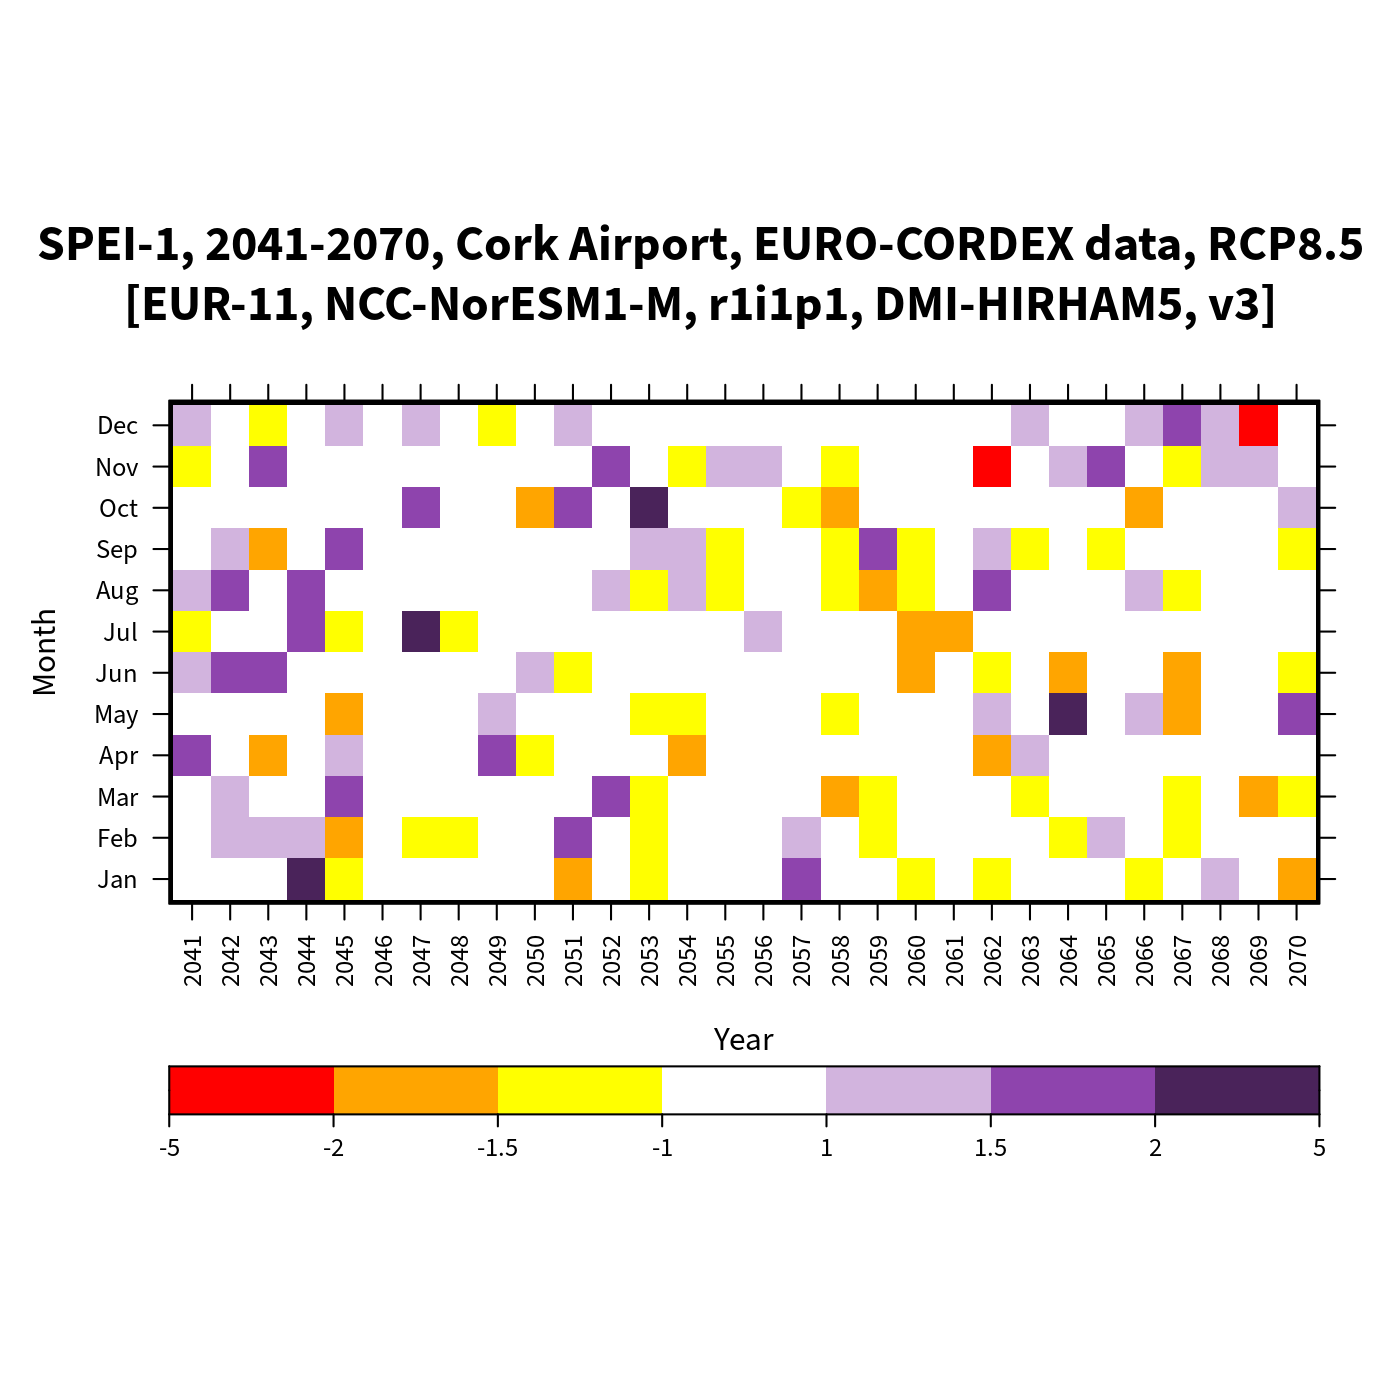

In [26]:
plot_title <- paste(
    "SPEI-1, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spei, plot_title = plot_title)